# Realiza el Entrenamiento del Modelo para Detección de Objetos (letras y números) usando ImageAI
Fuente: https://imageai.readthedocs.io/en/latest/customdetection/


0) Preparar ambiente e instalar paquetes:

In [0]:
# instala versión anterior de TF para compatibilidad con ImageAI
# notar que la sesión debe estar configurada como GPU
# seleccione <RESTART RUNTIME> al finalizar si lo solicita
#pip install tensorflow-gpu==1.13.1
!pip3 install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 44kB/s 
     |████████████████████████████████| 368kB 59.4MB/s 
     |████████████████████████████████| 3.2MB 62.0MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
# corrobora que se haya configurado un entorno con GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU no encontrado')
else:
  print('GPU encontrado: {}'.format(device_name))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

GPU encontrado: /device:GPU:0


In [0]:
# instala paquete de ImageAI
#pip install imageAI
!pip3 install imageai --upgrade

     |████████████████████████████████| 184kB 2.8MB/s 


1) Cargar librerías:

In [0]:
import os
import re
import shutil

import csv

from imageai.Detection import ObjectDetection
from IPython.display import Image, display
from imageai.Detection.Custom import DetectionModelTrainer

print ("Librerías cargadas.")

Librerías cargadas.


Using TensorFlow backend.


2) Montar el Drive:

In [0]:
# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# directorio local en Google Drive
path = '/content/gdrive/My Drive/IA/demoObjDet-Carteles'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


3) Preparar configuración para el entrenamiento:

In [0]:
# carga la lista de clases si no está definida   
with open( path + '/Carteles/clases.csv', mode='r') as csvfile:
    all_classes = list(csv.reader(csvfile))[0]
print('Definición de las clases a aprender: ', all_classes)

modeloPreEntrenado = ''

Definición de las clases a aprender:  ['L', 'N']


In [0]:
# obtiene el último modelo entrenado para usar como pre-entrenado (si existe)
# ( se considera que el último es el mejor)
# - si no se quiere usar modelo pre-entrenado, no ejecutar este código -
pathModelo = path+"/Carteles/models"
list_of_files =  [(pathModelo + '/' + f) for f in os.listdir(pathModelo) 
                                          if os.path.isfile(pathModelo + '/' + f) 
                                          and (os.path.splitext(f)[1]==".h5")]
if len(list_of_files)<=0:
  print("No se encontraron modelos entrenados!")
else:
  ultArchivo = max(list_of_files, key=os.path.getctime)
  modeloPreEntrenado = ultArchivo

print('Último modelo entrenado encontrado', modeloPreEntrenado)

Último modelo entrenado encontrado /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/models/modeloImageAIEntrenado.h5


In [0]:
# configura la clase suministrada por ImageAI para hacer el entrenamiento
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory( data_directory = path + "/Carteles" ) # indica el directorio raiz donde están imágenes y XML
trainer.setTrainConfig(object_names_array = all_classes, # define lista de clases a detectar 
                       batch_size = 4,  # batch size (dejar valor por defecto para evitar error por restricciones de Colab)
                       num_experiments = 100, # indica la cantidad de epochs (tener en cuenta que más épocas, más demora)
                       train_from_pretrained_model = modeloPreEntrenado) # define modelo de base pre-entrenado (si hay)

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.89
Anchor Boxes generated.
Detection configuration saved in  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/json/detection_config.json


4) Ejecutar el entrenamiento del modelo:

In [0]:
# para ver tiempo restante de la sesión de Colab
import time, psutil
Start = time.time()- psutil.boot_time()
Left= 12*3600 - Start
print('Tiempo restante: ', Left/3600, ' horas.')

Tiempo restante:  11.91731644862228  horas.


In [0]:
# entrena el modelo 
# y por cada época guarda en la sub-carpeta 'models' el modelo generado
# nota: cada tanto revisar el drive para ver que no se "llene" 
#       (en todo caso ir borrando archivos de modelos viejos)
trainer.trainModel()

In [0]:
# obtiene el mejor modelo entrenado para usar en la evaluación y predicción
# ( se considera que el último es el mejor )
pathModelo = path+"/Carteles/models"
list_of_files =  [(pathModelo + '/' + f) for f in os.listdir(pathModelo)
                      if os.path.isfile(pathModelo + '/' + f) and (os.path.splitext(f)[1]==".h5")]
if len(list_of_files)<=0:
  print("No se encontraron modelos entrenados!")
else:
  ultArchivo = max(list_of_files, key=os.path.getctime)
  print('Último modelo entrenado encontrado', ultArchivo)
  if (ultArchivo==(pathModelo + '/' +'modeloImageAIEntrenado.h5')):
    print('No se modifica modeloImageAIEntrenado.h5')
  else:
    shutil.copyfile(ultArchivo, pathModelo + '/modeloImageAIEntrenado.h5')
    print('Último modelo entrenado grabado como modeloImageAIEntrenado.h5')

Último modelo entrenado encontrado /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/models/detection_model-ex-041--loss-0001.298.h5
Último modelo entrenado grabado como modeloImageAIEntrenado.h5


5) Evaluar el modelo entrenado:

In [0]:
# ejecuta método para evaluar el modelo entrnado
metrics = trainer.evaluateModel(model_path = path+"/Carteles/models/modeloEntrenado.h5", # modelo entrenado o path donde se encuentran los modelos entrenados (procesa todos los encontrados)
                                json_path = path+"/Carteles/json/detection_config.json") # archivo de configuración generado durante el entrenamiento
                               # iou_threshold = 0.5, # desired Intersection over Union (def 0.5)
                               # object_threshold = 0.75, # minimum confidence score (def 0.3)
                               # nms_threshold = 0.5) # minimum Non-maximum Suppression  (def 0.5)

print('Resultados de la evaluación: ')
print(metrics)

6) Probar el modelo entrenado con imágenes de validación:

> Imágenes a probar:  8
>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_3_LLLL.png : 


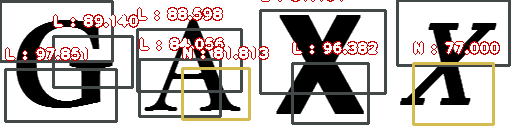


    objetos detectados:  10 

    -  L  :  78.99354100227356 % :  [0, 1, 112, 61]


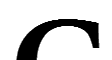

    -  L  :  94.29484605789185 % :  [397, 0, 509, 65]


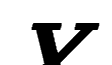

    -  L  :  81.46377205848694 % :  [260, 10, 385, 93]


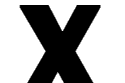

    -  L  :  89.14002776145935 % :  [53, 36, 132, 87]


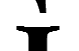

    -  L  :  88.59785199165344 % :  [137, 29, 241, 91]


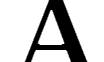

    -  L  :  84.05577540397644 % :  [139, 59, 220, 116]


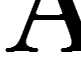

    -  L  :  97.8506326675415 % :  [5, 69, 116, 121]


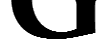

    -  N  :  81.81304931640625 % :  [182, 68, 249, 119]


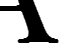

    -  L  :  96.38163447380066 % :  [292, 63, 368, 123]


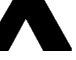

    -  N  :  76.99977159500122 % :  [413, 63, 493, 124]


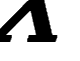

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_6_NLL.png : 


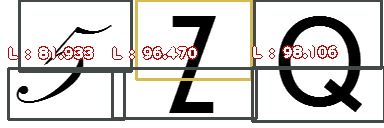


    objetos detectados:  6 

    -  L  :  93.87465715408325 % :  [19, 0, 131, 71]


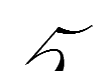

    -  N  :  91.3905382156372 % :  [136, 0, 251, 79]


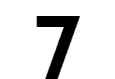

    -  L  :  80.75997829437256 % :  [254, 0, 381, 68]


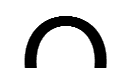

    -  L  :  81.93291425704956 % :  [8, 68, 124, 119]


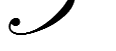

    -  L  :  96.4703619480133 % :  [112, 68, 256, 118]


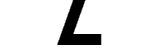

    -  L  :  98.10612797737122 % :  [252, 67, 384, 121]


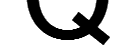

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_7_LLL.png : 


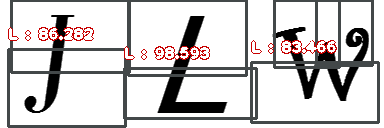


    objetos detectados:  7 

    -  L  :  78.81923317909241 % :  [11, 0, 129, 72]


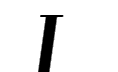

    -  L  :  78.09913754463196 % :  [128, 0, 246, 75]


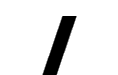

    -  L  :  81.50976300239563 % :  [274, 0, 339, 67]


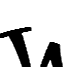

    -  L  :  77.03409790992737 % :  [316, 0, 372, 65]


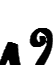

    -  L  :  86.28232479095459 % :  [8, 49, 125, 126]


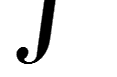

    -  L  :  98.59315752983093 % :  [124, 68, 256, 118]


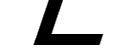

    -  L  :  83.46552848815918 % :  [251, 62, 378, 122]


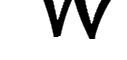

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_11_LLLN.png : 


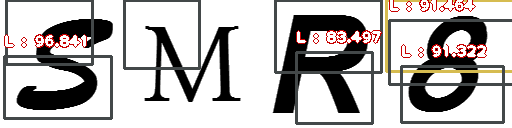


    objetos detectados:  8 

    -  L  :  75.04761219024658 % :  [6, 0, 92, 64]


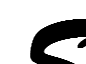

    -  L  :  76.83029770851135 % :  [124, 0, 199, 68]


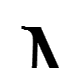

    -  L  :  82.06608295440674 % :  [275, 0, 381, 72]


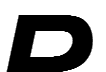

    -  N  :  84.24227833747864 % :  [386, 0, 515, 71]


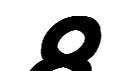

    -  L  :  91.46381616592407 % :  [389, 20, 513, 84]


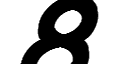

    -  L  :  96.84067964553833 % :  [4, 56, 111, 118]


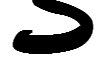

    -  L  :  83.49701166152954 % :  [296, 52, 372, 123]


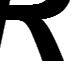

    -  L  :  91.32182002067566 % :  [401, 66, 503, 122]


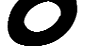

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_20_LLLLLN.png : 


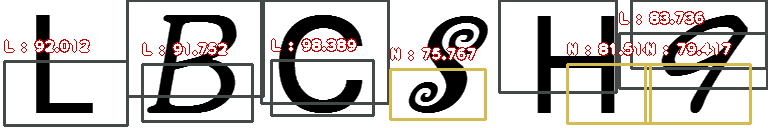


    objetos detectados:  11 

    -  L  :  85.1341724395752 % :  [631, 0, 766, 68]


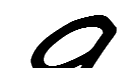

    -  L  :  91.26315712928772 % :  [127, 0, 263, 96]


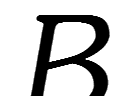

    -  L  :  76.05736255645752 % :  [261, 0, 388, 103]


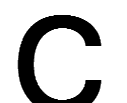

    -  L  :  89.24214243888855 % :  [499, 0, 616, 92]


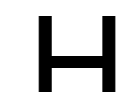

    -  L  :  83.73639583587646 % :  [619, 33, 767, 88]


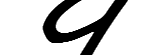

    -  L  :  98.38892221450806 % :  [271, 60, 373, 115]


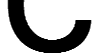

    -  L  :  92.01212525367737 % :  [4, 61, 127, 125]


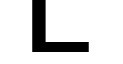

    -  L  :  91.7523443698883 % :  [142, 64, 252, 121]


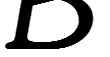

    -  N  :  75.76665878295898 % :  [390, 69, 485, 119]


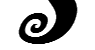

    -  N  :  81.51350021362305 % :  [567, 64, 650, 123]


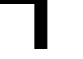

    -  N  :  79.4166088104248 % :  [645, 64, 750, 123]


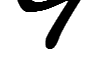

In [0]:
from imageai.Detection.Custom import CustomObjectDetection
from IPython.display import Image, display
from PIL import Image as ImPIL
import numpy as np
import os

# carga el modelo entrenado
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( path + '/Carteles/models/modeloImageAIEntrenado.h5' ) # define el modelo entrenado a usar
detector.setJsonPath( path + '/Carteles/json/detection_config.json' ) # define el archivo configuración a usar 
detector.loadModel()

# define la minima probabilidad que se va a usar para detectar objetos
minProbObjDet = 75

# configura las carpetas
dirTest = path +'/Carteles/validation/images' 

# levanta al azar algunas imágenes de prueba (10% del total)
allFileNames = [ fn for fn in os.listdir( dirTest ) if fn.endswith('.png') ]
process_FileNames, noProcess_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)*0.1)])
print("> Imágenes a probar: ", len(process_FileNames))

# procesa las imágenes
for fn in process_FileNames[:5]: 

  # define archivo a procesar y generar
  imagenProcesar = dirTest + '/' + fn
  print("> ", imagenProcesar, ": ")

  # procesa la imagen 
  returned_img, detections_info, detections_img = detector.detectObjectsFromImage(
                                            input_image = imagenProcesar, # imagen a procesar
                                            minimum_percentage_probability = minProbObjDet, # mínima probabilidad para considerar objetos detectados 
                                            display_percentage_probability = minProbObjDet, # mínima probabilidad para mostrar objetos en nueva imagen
                                            display_object_name = True, # indica que se muestra los nombres de las clases en nueva imagen
                                            extract_detected_objects = True, # indica que se genera nuevas sub-imágenes con los objetos detectados
                                            output_type = "array") # indica que devuelve también un array con sub-imágenes con los objetos detectados

  # muestra la imagen con los objetos detectados
  display( ImPIL.fromarray(returned_img, 'RGB') )

  print("\n    objetos detectados: ", len(detections_info), "\n")

  # procesa los objetos detectados
  for detection, det_obj in zip(detections_info, detections_img):    
    print("    - ", detection["name"], " : ", detection["percentage_probability"], "% : ", detection["box_points"])
    display( ImPIL.fromarray(det_obj, 'RGB') )
  